In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

norm = False

In [2]:
def load_dataset(base_path, file_name):
    """
    Load a dataset from a given path and file name.

    Parameters:
        base_path (str): The base directory path.
        file_name (str): The name of the file to load.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    file_path = os.path.join(base_path, file_name)
    data = pd.read_csv(file_path, sep='\t', header=None)
    return data

def min_max_norm(data):
    """
    Apply Min-Max normalization to the dataset (excluding the class label).

    Parameters:
        data (pd.DataFrame): The dataset to normalize.

    Returns:
        pd.DataFrame: Normalized dataset.
    """
    data_normalized = data.copy()
    feature_cols = data.columns[1:]  # Excluding the first column (class labels)
    data_normalized[feature_cols] = (data[feature_cols] - data[feature_cols].min()) / \
                                    (data[feature_cols].max() - data[feature_cols].min())
    return data_normalized

def explore_dataset(data):
    """
    Perform basic exploratory data analysis on the dataset.

    Parameters:
        data (pd.DataFrame): The dataset to analyze.

    Returns:
        None
    """
    print("Dataset Information:")
    print(data.info(), "\n")
    
    print("Dataset Summary Statistics:")
    print(data.describe(), "\n")
    
    print("Class Distribution:")
    print(data[0].value_counts(), "\n")
    
    print("Any Missing Values:")
    print(data.isnull().sum(), "\n")

def visualize_dataset(data, title_suffix=""):
    """
    Visualize the dataset with histograms, class distribution, and example time series.

    Parameters:
        data (pd.DataFrame): The dataset to visualize.
        title_suffix (str): Optional suffix for the plot titles.

    Returns:
        None
    """
    # Visualize class distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x=data[0], palette="viridis")
    plt.title(f"Class Distribution {title_suffix}")
    plt.xlabel("Class Label")
    plt.ylabel("Frequency")
    plt.show()

    # Plot summary statistics for time series
    plt.figure(figsize=(10, 6))
    mean_series = data.iloc[:, 1:].mean(axis=0)
    std_series = data.iloc[:, 1:].std(axis=0)
    plt.plot(mean_series, label="Mean", color='blue')
    plt.fill_between(range(len(mean_series)), mean_series - std_series, mean_series + std_series, color='blue', alpha=0.2)
    plt.title(f"Mean and Standard Deviation of Time Series Data {title_suffix}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    print("Mean and Standard Deviation of Time Series Data:")
    print(pd.concat([mean_series, std_series], axis=1, keys=["Mean", "Standard Deviation"]), "\n")

    # Plot example time series from each class
    classes = data[0].unique()
    plt.figure(figsize=(12, 8))
    for c in classes:
        example = data[data[0] == c].iloc[0, 1:].values
        plt.plot(example, label=f"Class {c}")
    plt.title(f"Example Time Series from Each Class {title_suffix}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [3]:
base_path = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/"

## ECG5000

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 550.9 KB
None 

Dataset Summary Statistics:
            0           1           2           3           4           5    \
count  500.0000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     1.5240   -0.159100   -1.551951   -2.442733   -3.098292   -3.177269   
std      0.7527    1.140292    1.416321    1.400143    1.325583    1.128045   
min      1.0000   -3.694197   -5.117621   -5.110389   -5.060774   -5.375715   
25%      1.0000   -0.928707   -2.644930   -3.617218   -4.251520   -4.022823   
50%      1.0000   -0.216883   -1.539340   -2.513000   -3.309532   -3.541513   
75%      2.0000    0.582008   -0.595632   -1.448769   -2.199136   -2.546305   
max      5.0000    4.058127    2.087844    1.592974    1.423006    1.014557   

              6           7           8           9    ...         131  \
c

/var/folders/8s/58gbth355dl9kf4d5khrfq440000gn/T/ipykernel_29760/171938017.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[0], palette="viridis")


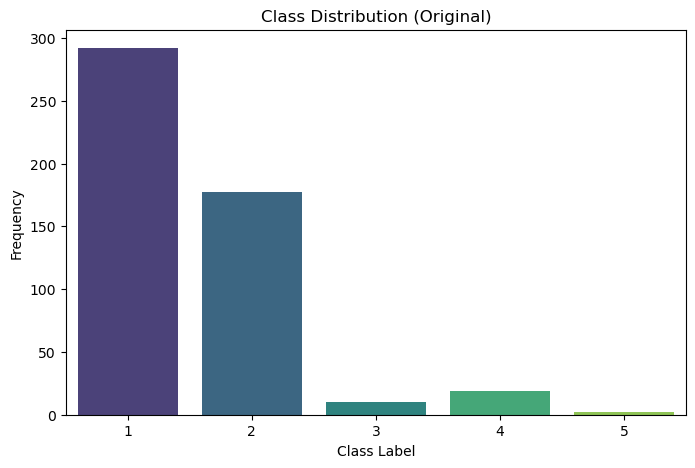

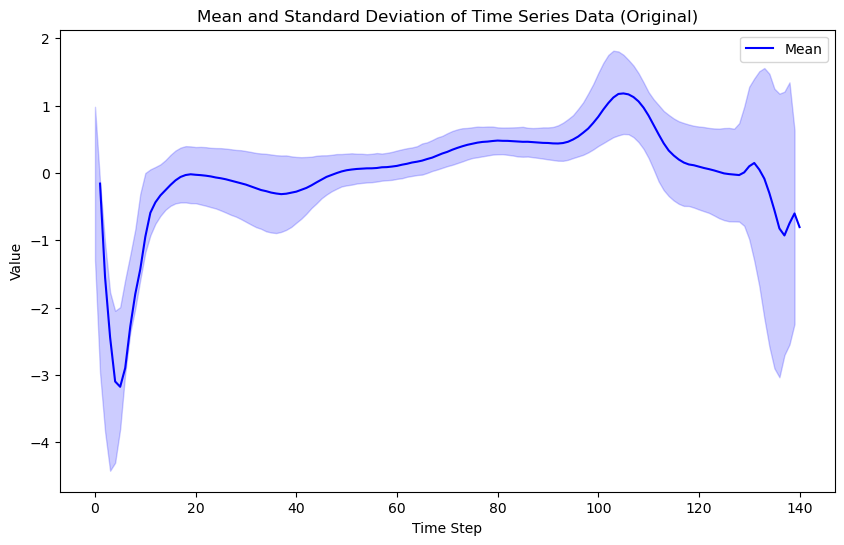

Mean and Standard Deviation of Time Series Data:
         Mean  Standard Deviation
1   -0.159100            1.140292
2   -1.551951            1.416321
3   -2.442733            1.400143
4   -3.098292            1.325583
5   -3.177269            1.128045
..        ...                 ...
136 -0.825774            2.076705
137 -0.929637            2.106171
138 -0.750090            1.955936
139 -0.602488            1.946638
140 -0.805451            1.438395

[140 rows x 2 columns] 



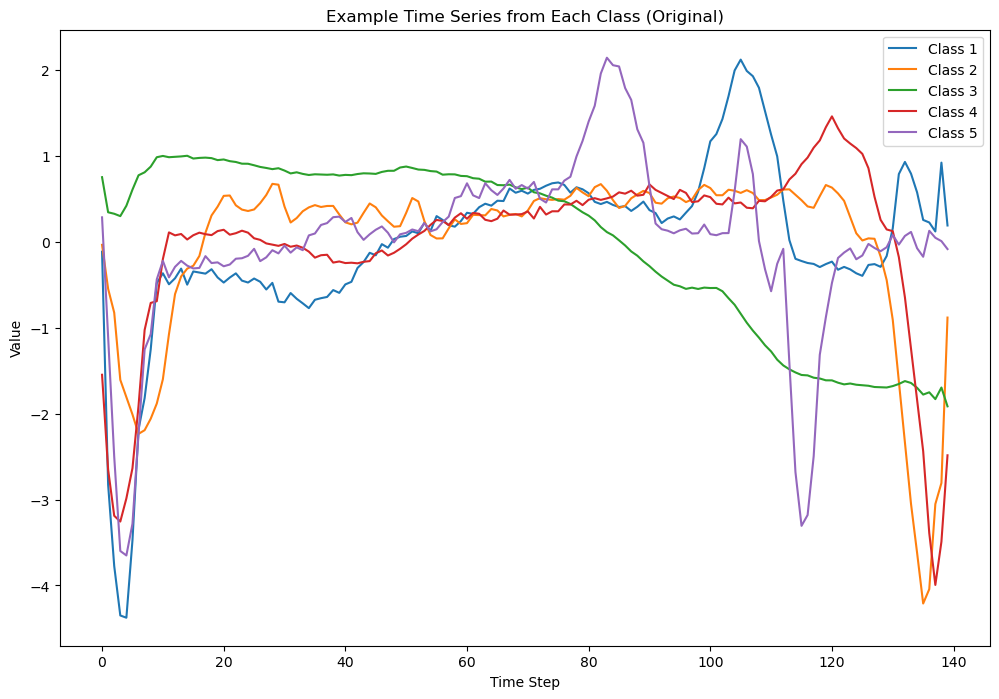

In [4]:
file_name1 = "ECG5000/ECG5000_TRAIN.tsv"
data = load_dataset(base_path, file_name1)

explore_dataset(data)
visualize_dataset(data, title_suffix="(Original)")
data_normalized = min_max_norm(data)
if norm:
    explore_dataset(data_normalized)
    visualize_dataset(data_normalized, title_suffix="(Normalized)")

# Wafer

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 153 entries, 0 to 152
dtypes: float64(152), int64(1)
memory usage: 1.2 MB
None 

Dataset Summary Statistics:
               0            1            2            3            4    \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.806000    -0.605769    -0.620867    -0.619494    -0.620667   
std       0.592212     1.001899     1.021014     1.020231     1.021208   
min      -1.000000    -2.183789    -2.592196    -2.494911    -2.529029   
25%       1.000000    -1.237424    -1.236296    -1.236296    -1.235586   
50%       1.000000    -1.123929    -1.123929    -1.123929    -1.122958   
75%       1.000000     0.463942     0.463942     0.465129     0.463942   
max       1.000000     1.332395     1.334377     1.332395     1.334377   

               5            6            7            8            9    ...  \
count  1000.000000  1000.000000  1000.0000

/var/folders/8s/58gbth355dl9kf4d5khrfq440000gn/T/ipykernel_29760/171938017.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[0], palette="viridis")


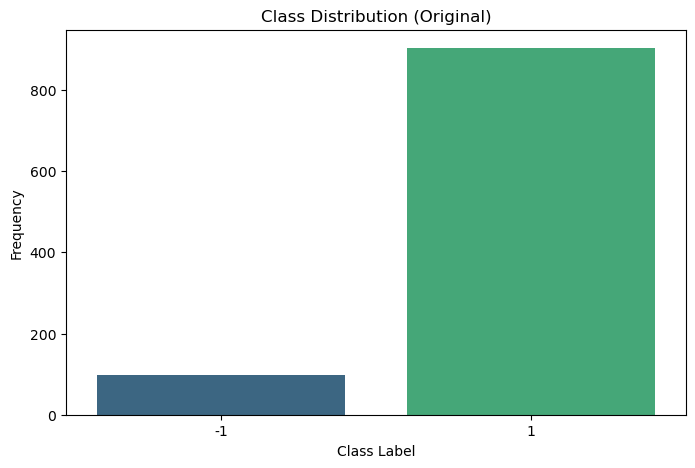

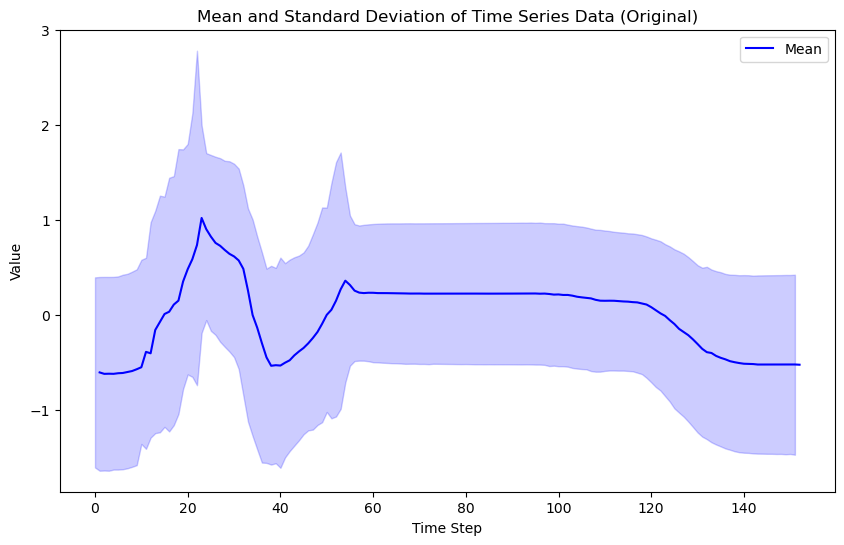

Mean and Standard Deviation of Time Series Data:
         Mean  Standard Deviation
1   -0.605769            1.001899
2   -0.620867            1.021014
3   -0.619494            1.020231
4   -0.620667            1.021208
5   -0.614360            1.015503
..        ...                 ...
148 -0.522939            0.942497
149 -0.522447            0.942415
150 -0.523394            0.944778
151 -0.522109            0.943234
152 -0.524641            0.948602

[152 rows x 2 columns] 



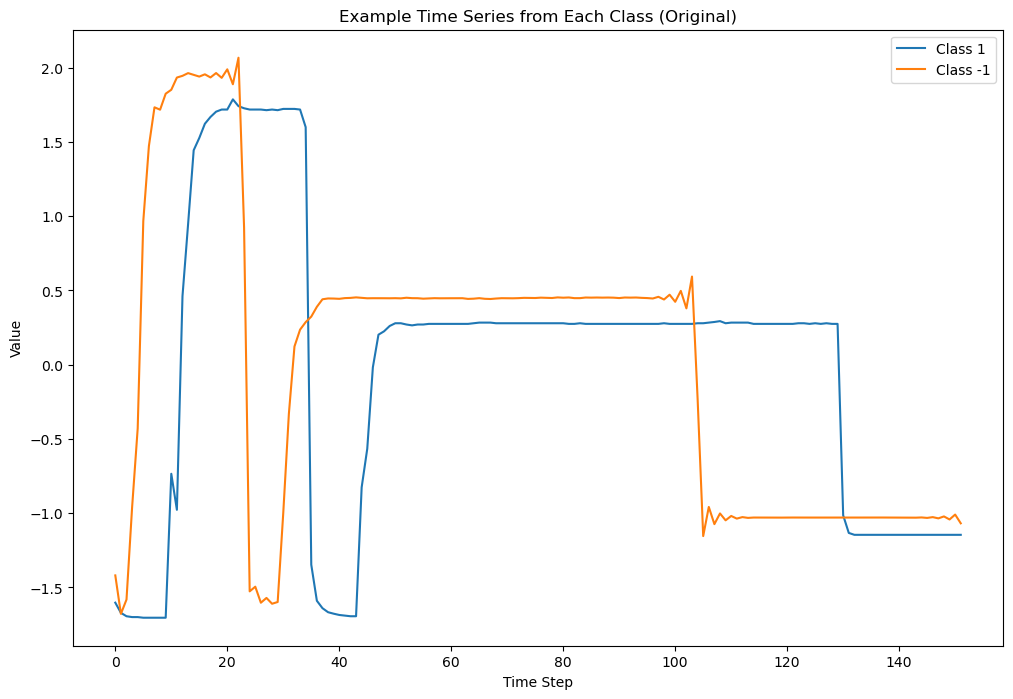

In [5]:
file_name2 = "Wafer/Wafer_TRAIN.tsv"
data = load_dataset(base_path, file_name2)

explore_dataset(data)
visualize_dataset(data, title_suffix="(Original)")
data_normalized = min_max_norm(data)
if norm:
    explore_dataset(data_normalized)
    visualize_dataset(data_normalized, title_suffix="(Normalized)")

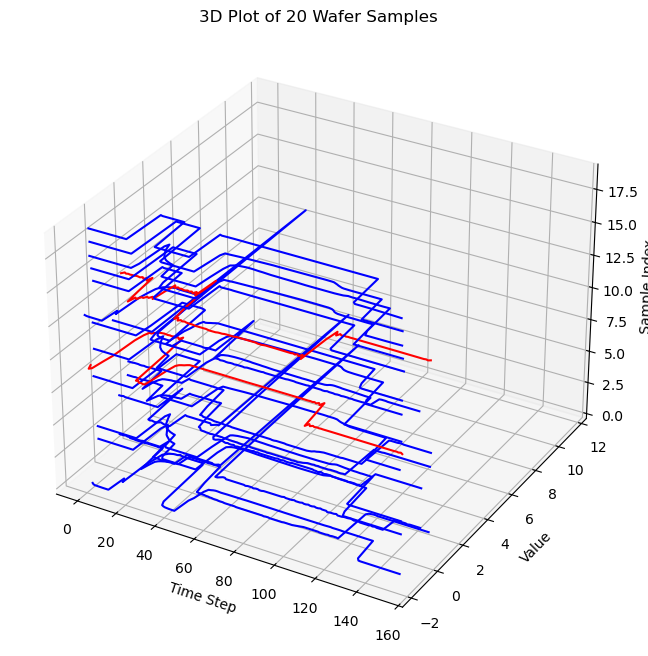

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting
import numpy as np

def load_dataset(file_path):
    """
    Load a TSV file into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the TSV file.
    
    Returns:
        pd.DataFrame: Loaded data.
    """
    return pd.read_csv(file_path, sep='\t', header=None)

# File path for the Wafer dataset (update the path if necessary)
wafer_file = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/Wafer/Wafer_TRAIN.tsv"

# Load the Wafer dataset
data = load_dataset(wafer_file)

# Select the first 20 samples (rows)
sample_data = data.iloc[:20, :]

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop over each of the 20 samples
for i, (_, row) in enumerate(sample_data.iterrows()):
    # The first element is the label
    label = row.iloc[0]
    # The rest are data points (features)
    features = row.iloc[1:].values.astype(float)
    # Create an array for time steps: one per data point
    time_steps = np.arange(len(features))
    # Use the loop index to determine the z position (spaced by 1)
    z_val = i  
    # Create an array of the same length for the z axis
    z = np.full_like(time_steps, z_val, dtype=float)
    # Color: red for abnormal (-1), blue for normal (1)
    color = 'red' if label == -1 else 'blue'
    # Plot the line in 3D: x=time step, y=feature value, z=sample index
    ax.plot(time_steps, features, z, color=color)

# Label the axes and set a title
ax.set_xlabel('Time Step')
ax.set_ylabel('Value')
ax.set_zlabel('Sample Index')
ax.set_title('3D Plot of 20 Wafer Samples')

plt.show()

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def load_dataset(file_path):
    """
    Load a TSV file into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the TSV file.
    
    Returns:
        pd.DataFrame: Loaded data.
    """
    return pd.read_csv(file_path, sep='\t', header=None)

# Define the file path for the Wafer dataset (update if necessary)
wafer_file = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/Wafer/Wafer_TRAIN.tsv"

# Load the dataset and select the first 20 samples
data = load_dataset(wafer_file)
sample_data = data.iloc[:20, :]

# Prepare a list of traces (one per sample)
traces = []

for i, (_, row) in enumerate(sample_data.iterrows()):
    # Extract the label and feature values
    label = row.iloc[0]
    features = row.iloc[1:].values.astype(float)
    
    # Create time steps corresponding to each data point
    time_steps = np.arange(len(features))
    
    # After swapping:
    # New x-axis: sample index (a constant for each row)
    x = np.full_like(time_steps, i, dtype=float)
    # New y-axis: time steps (original x-axis)
    y = time_steps
    # New z-axis: feature values (original value)
    z = features
    
    # Set color based on the label: red for abnormal (-1), blue for normal (1)
    color = 'red' if label == -1 else 'blue'
    
    # Create a 3D scatter (line) trace with the swapped axes
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='lines',
        line=dict(color=color, width=4),
        name=f'Sample {i} (Label {label})'
    )
    traces.append(trace)

# Define the layout with updated axis labels and a title
layout = go.Layout(
    title="Interactive 3D Plot of 20 Wafer Samples (Swapped Axes)",
    scene=dict(
        xaxis_title="Sample Index",
        yaxis_title="Time Step",
        zaxis_title="Value"
    ),
    width=800,
    height=600
)

# Create and display the figure
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [11]:
import pandas as pd

def load_dataset(file_path):
    """
    Load a TSV file into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the TSV file.
    
    Returns:
        pd.DataFrame: Loaded data.
    """
    return pd.read_csv(file_path, sep='\t', header=None)

# Define file paths (update these paths as necessary)
train_file = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/Wafer/Wafer_TRAIN.tsv"
test_file = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/Wafer/Wafer_TEST.tsv"

# Load the datasets
train_data = load_dataset(train_file)
test_data = load_dataset(test_file)

# Optional: Display a preview and label distribution
print("Train Data Preview:")
display(train_data.head())
print("Train Labels Distribution:")
print(train_data.iloc[:, 0].value_counts(), "\n")

print("Test Data Preview:")
display(test_data.head())
print("Test Labels Distribution:")
print(test_data.iloc[:, 0].value_counts(), "\n")

def compute_row_stats(df):
    """
    Compute row-wise mean and standard deviation for the feature columns.
    
    Parameters:
        df (pd.DataFrame): DataFrame where the first column is the label.
    
    Returns:
        tuple: (row_means, row_stds) as pandas Series.
    """
    # Exclude the label (first column) and compute row-wise statistics
    features = df.iloc[:, 1:]
    row_means = features.mean(axis=1)
    row_stds  = features.std(axis=1)
    return row_means, row_stds

# Compute row-wise stats for TRAIN and TEST datasets
train_row_means, train_row_stds = compute_row_stats(train_data)
test_row_means, test_row_stds   = compute_row_stats(test_data)

# Compute overall statistics by averaging the row-wise values
train_overall_mean = train_row_means.mean()
train_overall_std  = train_row_stds.mean()

test_overall_mean  = test_row_means.mean()
test_overall_std   = test_row_stds.mean()

# For combined statistics, concatenate the row-wise stats from both datasets
combined_row_means = pd.concat([train_row_means, test_row_means], axis=0)
combined_row_stds  = pd.concat([train_row_stds,  test_row_stds], axis=0)

combined_overall_mean = combined_row_means.mean()
combined_overall_std  = combined_row_stds.mean()

# Display the final overall statistics
print("Overall Row-wise Statistics:")
print("Train Dataset - Mean: {:.5f}, Std: {:.5f}".format(train_overall_mean, train_overall_std))
print("Test Dataset  - Mean: {:.5f}, Std: {:.5f}".format(test_overall_mean, test_overall_std))
print("Combined      - Mean: {:.5f}, Std: {:.5f}".format(combined_overall_mean, combined_overall_std))


Train Data Preview:


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432
1,1,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308
2,1,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316
3,1,-1.094523,-1.094523,-1.094523,-1.096732,-1.094523,-1.096732,-1.094523,-1.094523,-1.094523,...,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732
4,1,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,...,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761


Train Labels Distribution:
0
 1    903
-1     97
Name: count, dtype: int64 

Test Data Preview:


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707
1,1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,...,-1.110670,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259
2,1,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060
3,1,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,...,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382
4,1,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,...,-1.185968,-1.183789,-1.181610,-1.179431,-1.177251,-1.175072,-1.172893,-1.170714,-1.168535,-1.166356


Test Labels Distribution:
0
 1    5499
-1     665
Name: count, dtype: int64 

Overall Row-wise Statistics:
Train Dataset - Mean: -0.00000, Std: 1.00000
Test Dataset  - Mean: -0.00000, Std: 1.00000
Combined      - Mean: -0.00000, Std: 1.00000


In [13]:
import pandas as pd
import math
import numpy as np

def load_dataset(file_path):
    """
    Load a TSV file into a pandas DataFrame.
    
    Parameters:
        file_path (str): Path to the TSV file.
    
    Returns:
        pd.DataFrame: Loaded data.
    """
    return pd.read_csv(file_path, sep='\t', header=None)

def compute_row_stats_manual(df):
    """
    Manually compute the row-wise mean and standard deviation for feature columns.
    The first column is assumed to be the label and is excluded from the calculations.
    
    Parameters:
        df (pd.DataFrame): DataFrame where the first column is the label.
    
    Returns:
        tuple: (row_means, row_stds) as lists of floats.
    """
    row_means = []
    row_stds = []
    for index, row in df.iterrows():
        # Exclude the first element (label)
        features = row[1:].tolist()
        n = len(features)
        # Calculate mean
        mean_val = sum(features) / n
        row_means.append(mean_val)
        
        # Calculate sample standard deviation:
        # Compute sum of squared deviations
        sum_sq = sum((x - mean_val) ** 2 for x in features)
        # For sample standard deviation, divide by (n - 1)
        std_val = math.sqrt(sum_sq / (n - 1)) if n > 1 else 0.0
        row_stds.append(std_val)
        
    return row_means, row_stds

# --- Test with a Dummy Dataset ---
# Each row: [label, data1, data2, data3]
dummy_data = pd.DataFrame([
    [1, 2, 4, 6],   # Expected: mean = (2+4+6)/3 = 4.0, std = 2.0
    [-1, 1, 3, 5]   # Expected: mean = (1+3+5)/3 = 3.0, std = 2.0
])

dummy_means, dummy_stds = compute_row_stats_manual(dummy_data)
print("Dummy Dataset - Manual Row-wise Statistics:")
for i, (m, s) in enumerate(zip(dummy_means, dummy_stds)):
    print(f"Row {i}: Mean = {m:.5f}, Std = {s:.5f}")

# --- Use Real Datasets ---
# Update the file paths to your actual TRAIN and TEST file locations.
train_file = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/Wafer/Wafer_TRAIN.tsv"
test_file  = "/Users/mikel/Documents/GitHub/polimikel/data/UCR_dataset/Wafer/Wafer_TEST.tsv"

# Load the datasets
train_data = load_dataset(train_file)
test_data  = load_dataset(test_file)

# Optionally display a preview and label distribution
print("\nTrain Data Preview:")
display(train_data.head())
print("Train Labels Distribution:")
print(train_data.iloc[:, 0].value_counts(), "\n")

print("Test Data Preview:")
display(test_data.head())
print("Test Labels Distribution:")
print(test_data.iloc[:, 0].value_counts(), "\n")

# Compute manual row-wise statistics for each dataset
train_row_means_manual, train_row_stds_manual = compute_row_stats_manual(train_data)
test_row_means_manual, test_row_stds_manual   = compute_row_stats_manual(test_data)

# Compute overall statistics (averaging the row-wise means and stds)
train_overall_mean_manual = np.mean(train_row_means_manual)
train_overall_std_manual  = np.mean(train_row_stds_manual)

test_overall_mean_manual  = np.mean(test_row_means_manual)
test_overall_std_manual   = np.mean(test_row_stds_manual)

# For combined statistics, merge the lists from both datasets
combined_row_means_manual = train_row_means_manual + test_row_means_manual
combined_row_stds_manual  = train_row_stds_manual + test_row_stds_manual

combined_overall_mean_manual = np.mean(combined_row_means_manual)
combined_overall_std_manual  = np.mean(combined_row_stds_manual)

# Display the overall manual row-wise statistics
print("\nOverall Manual Row-wise Statistics:")
print("Train Dataset - Mean: {:.5f}, Std: {:.5f}".format(train_overall_mean_manual, train_overall_std_manual))
print("Test Dataset  - Mean: {:.5f}, Std: {:.5f}".format(test_overall_mean_manual, test_overall_std_manual))
print("Combined      - Mean: {:.5f}, Std: {:.5f}".format(combined_overall_mean_manual, combined_overall_std_manual))


Dummy Dataset - Manual Row-wise Statistics:
Row 0: Mean = 4.00000, Std = 2.00000
Row 1: Mean = 3.00000, Std = 2.00000

Train Data Preview:


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432
1,1,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308
2,1,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316
3,1,-1.094523,-1.094523,-1.094523,-1.096732,-1.094523,-1.096732,-1.094523,-1.094523,-1.094523,...,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732
4,1,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,...,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761


Train Labels Distribution:
0
 1    903
-1     97
Name: count, dtype: int64 

Test Data Preview:


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,...,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707
1,1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,...,-1.110670,-1.112846,-1.115023,-1.117199,-1.119376,-1.121553,-1.123729,-1.125906,-1.128082,-1.130259
2,1,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,...,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060
3,1,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,...,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382,-1.149382
4,1,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,...,-1.185968,-1.183789,-1.181610,-1.179431,-1.177251,-1.175072,-1.172893,-1.170714,-1.168535,-1.166356


Test Labels Distribution:
0
 1    5499
-1     665
Name: count, dtype: int64 


Overall Manual Row-wise Statistics:
Train Dataset - Mean: -0.00000, Std: 1.00000
Test Dataset  - Mean: -0.00000, Std: 1.00000
Combined      - Mean: -0.00000, Std: 1.00000


# Earthquakes

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Columns: 513 entries, 0 to 512
dtypes: float64(512), int64(1)
memory usage: 1.3 MB
None 

Dataset Summary Statistics:
              0           1           2           3           4           5    \
count  322.000000  322.000000  322.000000  322.000000  322.000000  322.000000   
mean     0.180124    0.054088   -0.012575    0.060070    0.063550   -0.008471   
std      0.384889    1.071217    0.974196    1.037486    1.063598    0.950326   
min      0.000000   -0.885817   -0.885817   -0.885817   -0.786819   -0.786819   
25%      0.000000   -0.490417   -0.493297   -0.485682   -0.497065   -0.496431   
50%      0.000000   -0.391835   -0.406376   -0.385140   -0.393743   -0.395129   
75%      0.000000   -0.252087   -0.262655   -0.245584   -0.249521   -0.252087   
max      1.000000    5.199567    3.927112    4.740132    4.097649    4.889646   

              6           7           8           9    ... 

/var/folders/8s/58gbth355dl9kf4d5khrfq440000gn/T/ipykernel_29760/171938017.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[0], palette="viridis")


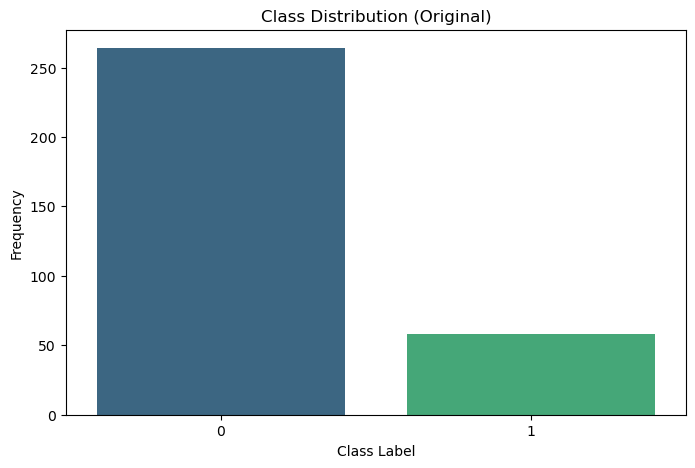

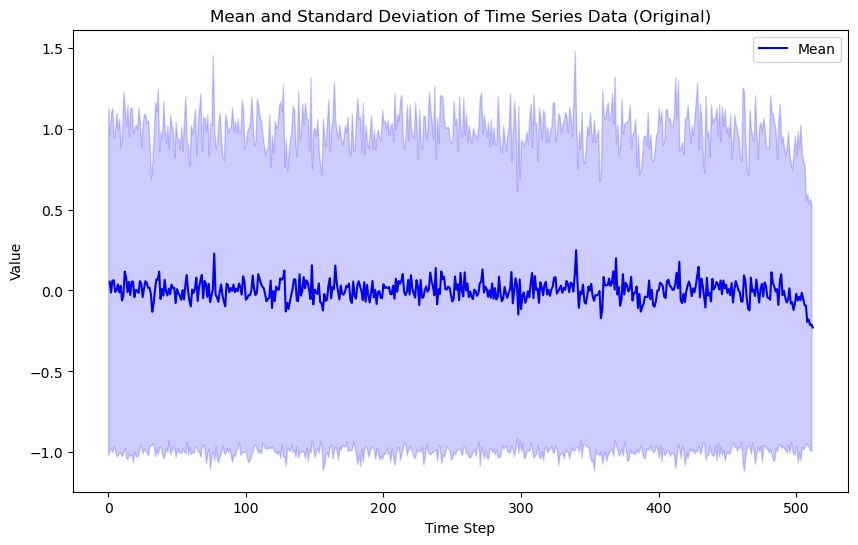

Mean and Standard Deviation of Time Series Data:
         Mean  Standard Deviation
1    0.054088            1.071217
2   -0.012575            0.974196
3    0.060070            1.037486
4    0.063550            1.063598
5   -0.008471            0.950326
..        ...                 ...
508 -0.195097            0.746654
509 -0.179216            0.777180
510 -0.213229            0.748120
511 -0.209882            0.777103
512 -0.228488            0.760789

[512 rows x 2 columns] 



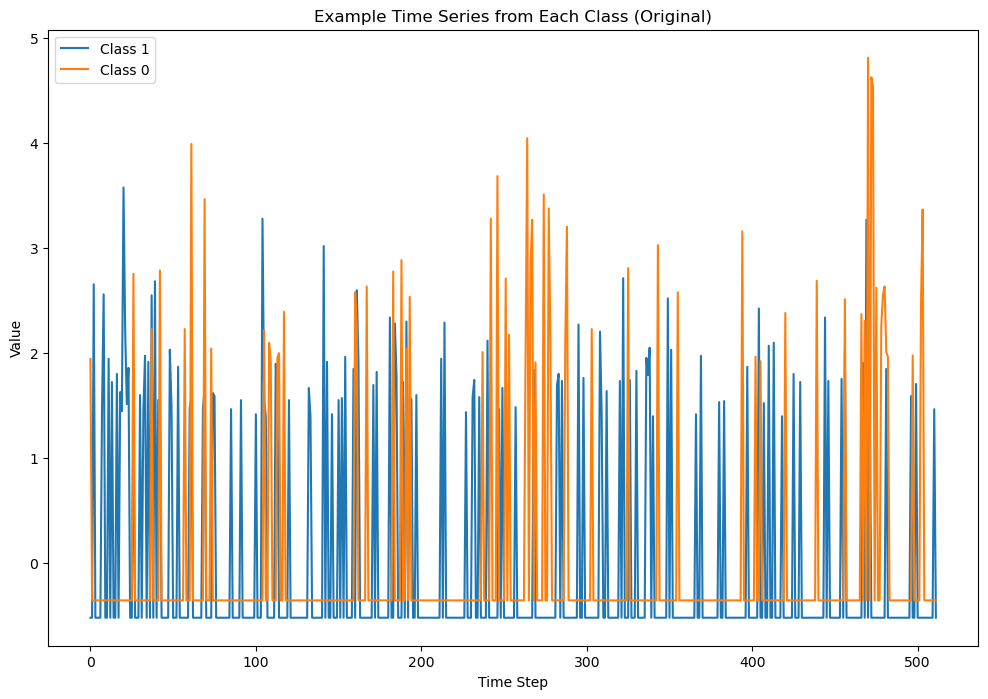

In [6]:
file_name3 = "Earthquakes/Earthquakes_TRAIN.tsv"
data = load_dataset(base_path, file_name3)

explore_dataset(data)
visualize_dataset(data, title_suffix="(Original)")
data_normalized = min_max_norm(data)
if norm:
    explore_dataset(data_normalized)
    visualize_dataset(data_normalized, title_suffix="(Normalized)")

# Ford-A

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, 0 to 500
dtypes: float64(500), int64(1)
memory usage: 13.8 MB
None 

Dataset Summary Statistics:
               0            1            2            3            4    \
count  3601.000000  3601.000000  3601.000000  3601.000000  3601.000000   
mean     -0.025271    -0.016708    -0.015270    -0.013605    -0.011943   
std       0.999819     1.058455     1.051904     1.044560     1.042573   
min      -1.000000    -3.933454    -3.656912    -3.479467    -3.595350   
25%      -1.000000    -0.685693    -0.699526    -0.688302    -0.709732   
50%      -1.000000    -0.007573    -0.003044    -0.003066     0.008598   
75%       1.000000     0.660360     0.674898     0.683698     0.679474   
max       1.000000     3.503936     3.369278     3.498286     3.493830   

               5            6            7            8            9    ...  \
count  3601.000000  3601.000000  3601.00

/var/folders/8s/58gbth355dl9kf4d5khrfq440000gn/T/ipykernel_29760/171938017.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[0], palette="viridis")


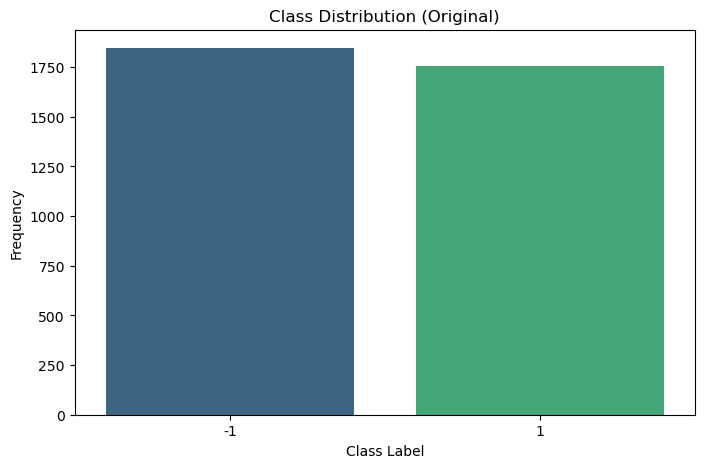

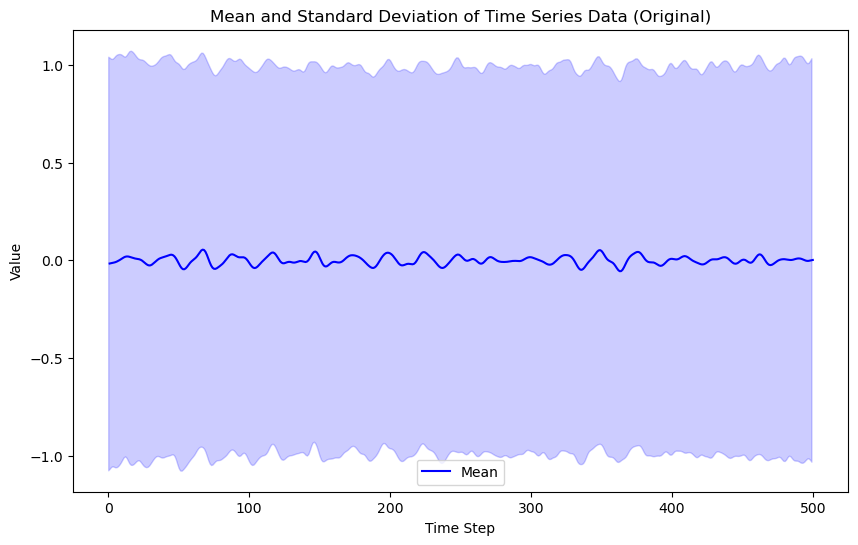

Mean and Standard Deviation of Time Series Data:
         Mean  Standard Deviation
1   -0.016708            1.058455
2   -0.015270            1.051904
3   -0.013605            1.044560
4   -0.011943            1.042573
5   -0.009966            1.046933
..        ...                 ...
496 -0.003369            1.018719
497 -0.003237            1.011871
498 -0.001820            1.012367
499  0.000031            1.020914
500  0.001395            1.032490

[500 rows x 2 columns] 



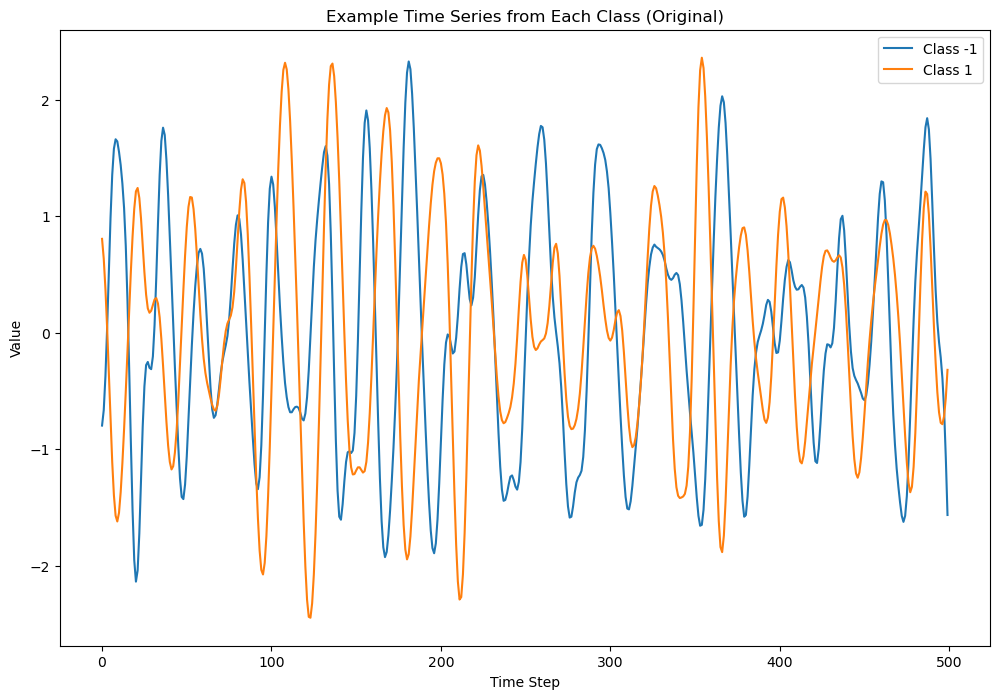

In [7]:
file_name4 = "FordA/FordA_TRAIN.tsv"
data = load_dataset(base_path, file_name4)

explore_dataset(data)
visualize_dataset(data, title_suffix="(Original)")
data_normalized = min_max_norm(data)
if norm:
    explore_dataset(data_normalized)
    visualize_dataset(data_normalized, title_suffix="(Normalized)")

# Ford-B

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Columns: 501 entries, 0 to 500
dtypes: float64(500), int64(1)
memory usage: 13.9 MB
None 

Dataset Summary Statistics:
               0            1            2            3            4    \
count  3636.000000  3636.000000  3636.000000  3636.000000  3636.000000   
mean     -0.023102     0.022066     0.023825     0.023903     0.022249   
std       0.999871     1.057046     1.051539     1.039919     1.028724   
min      -1.000000    -5.021644    -4.844745    -5.370140    -5.539048   
25%      -1.000000    -0.647199    -0.667075    -0.644592    -0.643143   
50%      -1.000000     0.032546     0.013708     0.030287     0.043467   
75%       1.000000     0.709597     0.719385     0.694341     0.677195   
max       1.000000     4.784961     4.571110     4.038542     3.932537   

               5            6            7            8            9    ...  \
count  3636.000000  3636.000000  3636.00

/var/folders/8s/58gbth355dl9kf4d5khrfq440000gn/T/ipykernel_29760/171938017.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[0], palette="viridis")


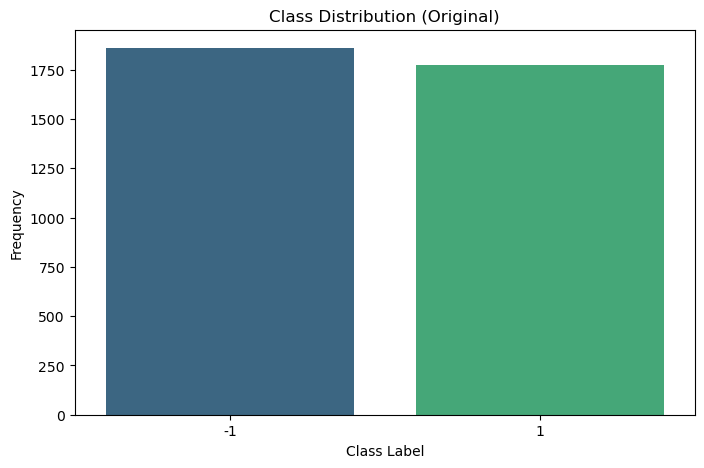

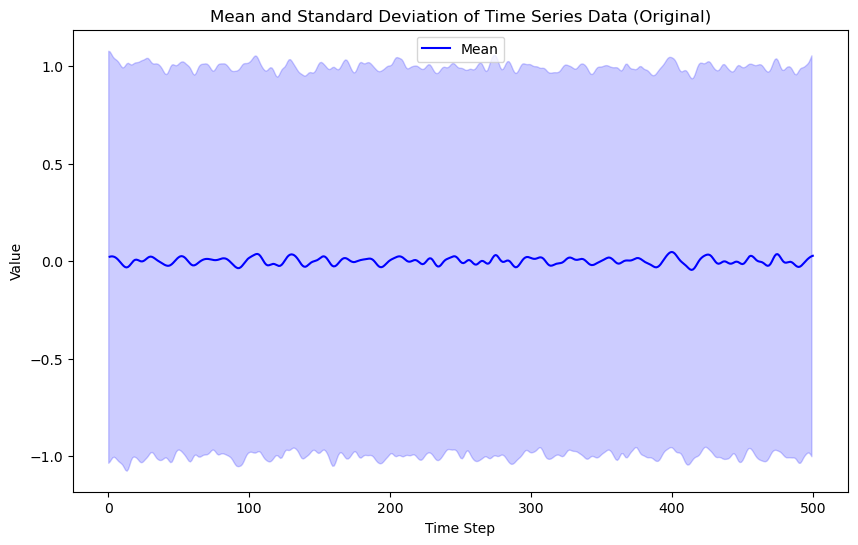

Mean and Standard Deviation of Time Series Data:
         Mean  Standard Deviation
1    0.022066            1.057046
2    0.023825            1.051539
3    0.023903            1.039919
4    0.022249            1.028724
5    0.018968            1.022927
..        ...                 ...
496  0.007645            0.997659
497  0.014180            0.997739
498  0.019677            1.001877
499  0.024065            1.013071
500  0.026984            1.028408

[500 rows x 2 columns] 



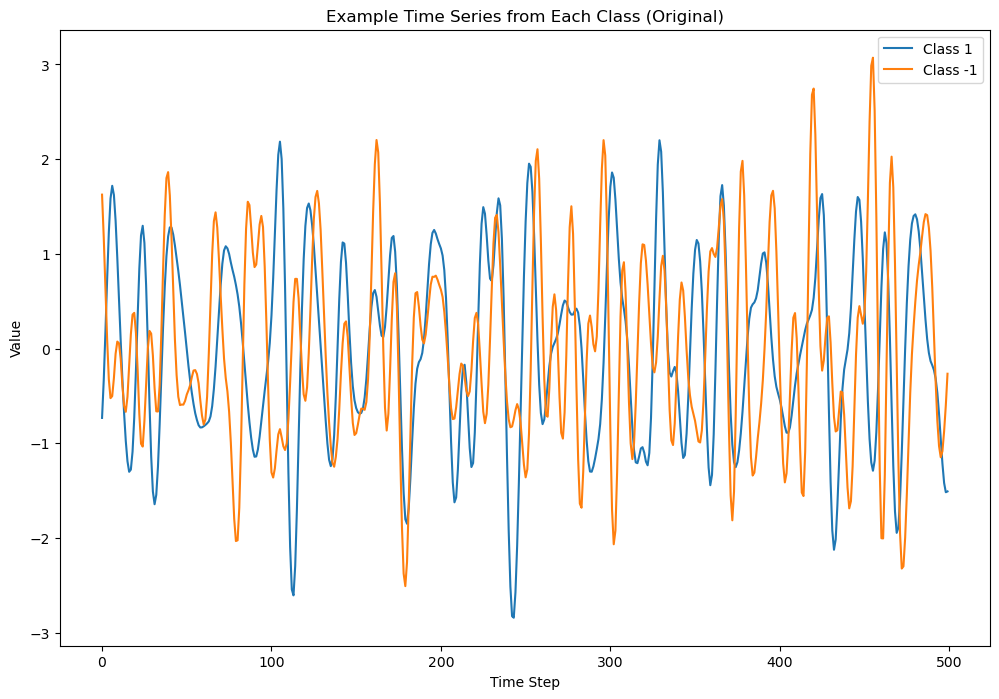

In [8]:
file_name5 = "FordB/FordB_TRAIN.tsv"
data = load_dataset(base_path, file_name5)

explore_dataset(data)
visualize_dataset(data, title_suffix="(Original)")
data_normalized = min_max_norm(data)
if norm:
    explore_dataset(data_normalized)
    visualize_dataset(data_normalized, title_suffix="(Normalized)")

# SNNTorch plot examples

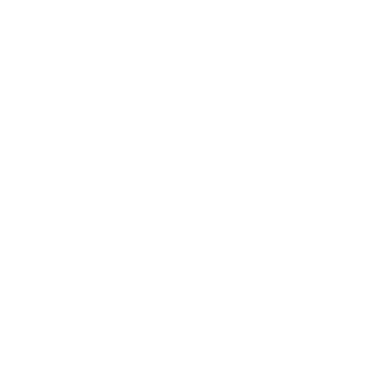

In [9]:
import torch
import snntorch.spikeplot as splt
import matplotlib.pyplot as plt

# Generate random spiking data
# shape: [time_steps, height, width]
time_steps = 50
height = 20
width = 20
# We threshold random values to obtain spike events (0s and 1s).
spike_data_sample = (torch.rand(time_steps, height, width) > 0.8).float()

# Create a figure
fig, ax = plt.subplots()

# Create the animation
anim = splt.animator(spike_data_sample, fig, ax)

# Save the animation as a GIF
#anim.save("random_spike_sample.gif", writer="pillow")

from IPython.display import HTML
HTML(anim.to_html5_video())